In [1]:
from pylab import *

In [2]:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

def mov_planet1(t,x):
    # x es x,y,vx,vy
    dx = x[2]
    dy = x[3]
    d32xy = (x[0]**2 + x[1]**2)**1.5
    dvx = -x[0]/d32xy
    dvy = -x[1]/d32xy
    return array([ dx , dy , dvx , dvy ])

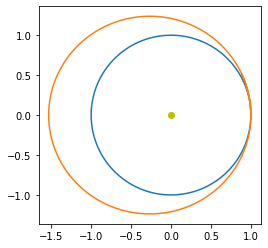

In [3]:
cond_ini = [1,0,0,1]
solucion = RK4(mov_planet1,(0,2*pi),cond_ini)
plot(solucion[1][0],solucion[1][1])
cond_ini = [1,0,0,1.1]
solucion = RK4(mov_planet1,(0,3*pi),cond_ini)
plot(solucion[1][0],solucion[1][1])
plot([0],[0],'yo')
gca().set_aspect('equal')
show()

In [4]:
def vec_L2D(datos,n_part=1):
    variables , integraciones = datos.shape
    momento_angular = zeros(integraciones)
    for i in range(integraciones):
        momento_angular[i]= cross(datos[:2,i],datos[2:,i])
    return momento_angular

Momento angular inicial= 1.1
Momento angular inicial= 1.0999999999729022


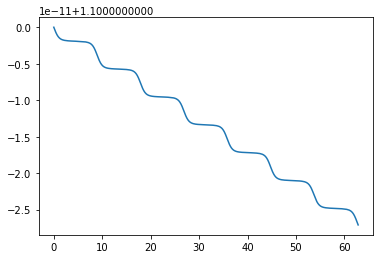

In [5]:
cond_ini = [1,0,0,1.1]
solucion = RK4(mov_planet1,(0,2*pi*10),cond_ini)
L = vec_L2D(solucion[1])
plot(solucion[0],L)
print('Momento angular inicial=', L[0])
print('Momento angular inicial=', L[-1])
#ylim([L.min(),L.max()])
show()

In [15]:
def Ener_K(datos):
    variables , integraciones = datos.shape
    E_K = zeros(integraciones)
    for i in range(integraciones):
        E_K[i]= 0.5*(datos[2,i]**2 + datos[3,i]**2)
    return E_K

def Ener_U(datos):
    variables , integraciones = datos.shape
    E_U = zeros(integraciones)
    for i in range(integraciones):
        E_U[i]= -1/sqrt(datos[0,i]**2 + datos[1,i]**2)
    return E_U

def Ener_T(datos):
    return Ener_K(datos)+Ener_U(datos)

-0.3949999999999999


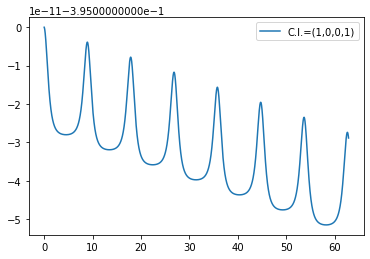

In [20]:
cond_ini = [1,0,0,1.1]
solucion = RK4(mov_planet1,(0,2*pi*10),cond_ini)
E = Ener_T(solucion[1])
print(E[0])
plot(solucion[0],E,label='C.I.=(1,0,0,1.1)')
#ylim([-0.5,0])

#cond_ini = [1,0,0,1.1]
#solucion = RK4(mov_planet1,(0,2*pi*10),cond_ini)
#K = Ener_K(solucion[1])
#plot(solucion[0],K,label='C.I.=(1,0,0,1.1)')

legend()
show()

In [21]:
from scipy.integrate import *

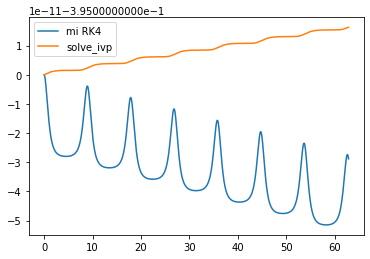

In [53]:
sol = solve_ivp(mov_planet1,(0,2*pi*10),cond_ini,method='RK45',
               atol=1e-12,rtol=1e-12)
plot(solucion[0],E,label='mi RK4')
plot(sol.t,Ener_T(sol.y),label='solve_ivp')
legend()
show()

In [37]:
%%timeit
RK4(mov_planet1,(0,2*pi*10),cond_ini)

58.1 ms ± 531 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
%%timeit
sol = solve_ivp(mov_planet1,(0,2*pi*10),cond_ini,method='RK45',
               atol=1e-12,rtol=1e-12)

74.2 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
